In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import xarray as xr

In [ ]:
# Define a simple 2D convolutional layer with zeros padding
layer = torch.nn.Conv2d(
    in_channels=1,
    out_channels=1,
    kernel_size=(3,3),
    padding=1,
    padding_mode='zeros'
)

torch.Size([1, 1, 90, 180])


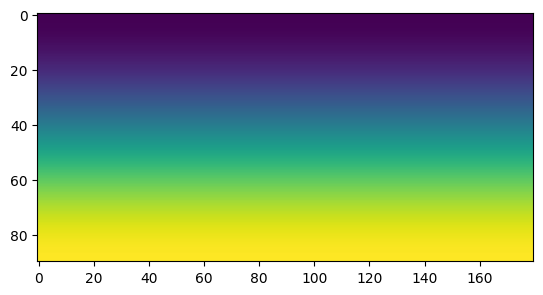

In [56]:
# Input data will be the Coriolis parameter which is zonally uniform
lat = np.arange(-90,90,2)
lat = np.sin(lat*np.pi/180)
f = np.expand_dims(lat, axis=1)
f = np.repeat(f, 180, axis=1)
f = torch.tensor(f).unsqueeze(0).unsqueeze(0)

print(f.shape)
plt.imshow(f[0,0].detach())
plt.show()

In [57]:
out = layer(torch.tensor(f).float())
print(out.shape)

torch.Size([1, 1, 90, 180])


/tmp/ipykernel_44844/1253593369.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out = layer(torch.tensor(f).float())


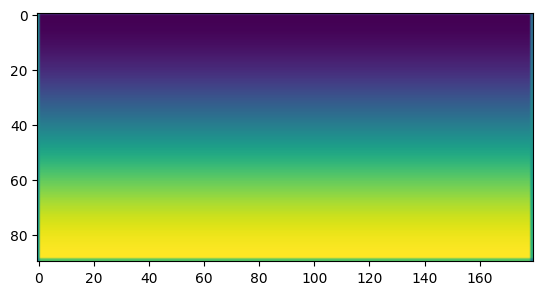

In [54]:
plt.imshow(out[0,0].detach())

In [ ]:
# Write your own padding function!

def lat_lon_pad(x, pad):

    return x